In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Input, Conv2D, Dense, Dropout
from tensorflow.keras.models import Model

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255, x_test/255
print("x_train shape:", x_train.shape)

4422102/4422102 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28)


In [5]:
 x_train = np.expand_dims(x_train, -1)
 x_test = np.expand_dims(x_test, -1)
 print(x_train.shape)


(60000, 28, 28, 1)


In [6]:
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


In [7]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 37s 19ms/step - loss: 0.5252 - accuracy: 0.8056 - val_loss: 0.4224 - val_accuracy: 0.8452
Epoch 2/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3612 - accuracy: 0.8636 - val_loss: 0.3564 - val_accuracy: 0.8670
Epoch 3/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3116 - accuracy: 0.8829 - val_loss: 0.3333 - val_accuracy: 0.8783
Epoch 4/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2798 - accuracy: 0.8947 - val_loss: 0.2996 - val_accuracy: 0.8909
Epoch 5/15
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2524 - accuracy: 0.9050 - val_loss: 0.3041 - val_accuracy: 0.8907
Epoch 6/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2333 - accuracy: 0.9111 - val_loss: 0.2916 - val_accuracy: 0.8948
Epoch 7/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2128 - accuracy: 0.9195 - val_loss: 0.2971 -

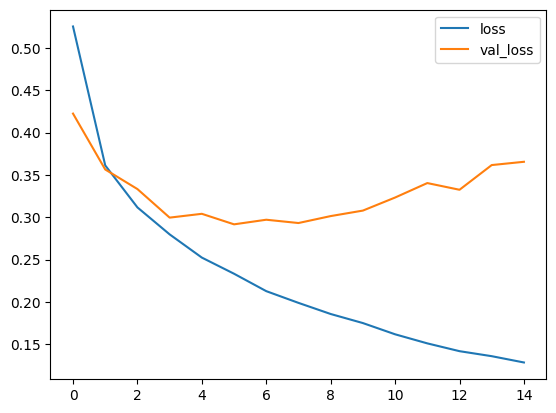

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

[]

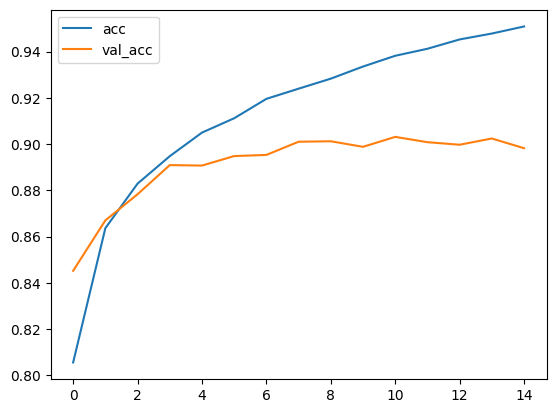

In [12]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.plot()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[825   0  22  32   1   2 116   0   2   0]
 [  0 974   1  17   4   0   2   0   2   0]
 [ 14   0 856   9  40   0  78   0   3   0]
 [  9   4  14 900  42   1  27   0   3   0]
 [  1   0  80  19 809   0  89   0   2   0]
 [  0   0   0   0   0 967   0  25   1   7]
 [ 94   0  60  29  60   0 749   0   8   0]
 [  0   0   0   0   0  11   0 967   0  22]
 [  5   1   3   1   6   3   5   1 974   1]
 [  1   0   0   0   0   4   0  34   0 961]]


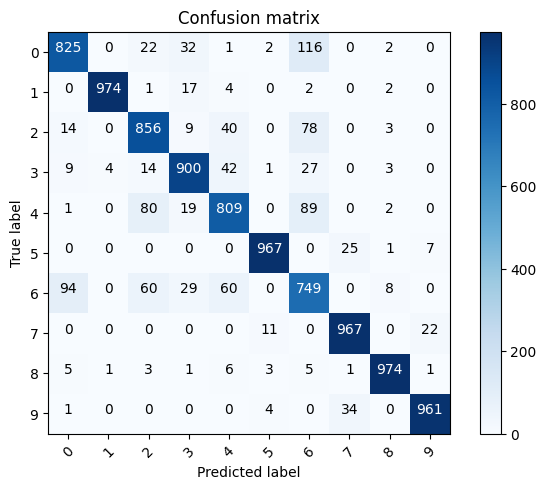

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

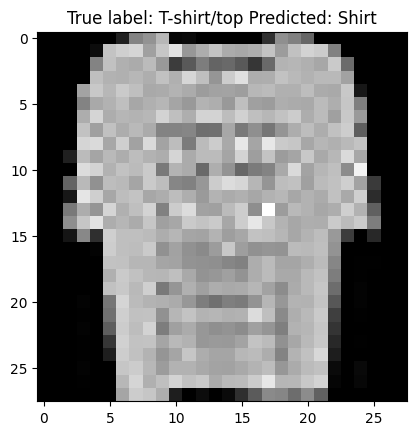

In [17]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));